In [ ]:
#Necessary imports...
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

from gutenberg import Gutenberg


In [ ]:
g = Gutenberg()
g.getCatalog()

# TFIDF

In [ ]:
sample = g.getCatalog() #.loc[:1000,:]
train,test = train_test_split(sample,test_size=0.2,random_state=42)

In [ ]:
# count_books_to_analyze=1000
raw_docs_filepaths = ["books/"+str(idx)+".txt" for idx,book in train.iterrows()]
tfidf_model = TfidfVectorizer(
    input='filename', 
    analyzer='word',
    stop_words='english',
    ngram_range = (1,1), 
    max_features = 1000,    
    max_df = 0.8, #ignore terms that appear in > than max_df % of docs 
    use_idf=True)
tfidf_result=tfidf_model.fit_transform(raw_docs_filepaths)

In [ ]:
tfidf_index = [int(x.split("/")[1].split(".")[0]) for x in raw_docs_filepaths]
test_books_path = ["books/"+str(idx)+".txt" for idx,book in test.iterrows()]
tfidf_train=tfidf_model.transform(test_books_path)

In [ ]:
test_index = [int(x.split("/")[1].split(".")[0]) for x in test_books_path]
X_train = tfidf_result
Y_train = train
X_test = tfidf_train
Y_test = test

# Naive Bayes Classifier

In [115]:
from sklearn.naive_bayes import GaussianNB
nbcs = {}
for i in train.columns[1:]:
    nbcs[i] = GaussianNB()
    nbcs[i].fit(X_train.toarray(),Y_train[i])
nbcPredictions = {}
for i in nbcs:
    nbcPredictions[i] = []
    for j in range(len(Y_test)):
        nbcPredictions[i].append(1) if (nbcs[i].predict(X_test[j].toarray()) > 0.5) else nbcPredictions[i].append(0)
nbcscores = {}
for i in nbcPredictions:
    nbcscores[i] = f1_score(Y_test[i], nbcPredictions[i])
nbcscores

{'Juvenile fiction': 0.5605483625285607,
 'History': 0.4414796846573681,
 'Poetry': 0.5576642335766424,
 'Politics and gouvernment': 0.4847396768402154,
 'Cooking': 0.9347826086956522,
 'Mistery': 0.38270270270270274,
 'Philosophy': 0.2918454935622317,
 'Christian': 0.1968408262454435,
 'Love stories': 0.2691190706679574,
 'Periodicals': 0.5369003690036901,
 'Humor': 0.36489151873767256,
 'Travelling': 0.4752941176470588,
 'Correspondence': 0.0923076923076923,
 'Adventure': 0.3145353455123113,
 'Drama': 0.4789915966386555,
 'Biography': 0.3448979591836735,
 'Historical fiction': 0.2434607645875252,
 'Science fiction': 0.4875346260387813,
 'Fantasy fiction': 0.2706913339824732,
 'Science': 0.3685636856368564,
 'Others': 0.19771863117870722}

# Linear regression

In [ ]:
linearClassifiers = {}
for i in train.columns[1:]:
    linearClassifiers[i] = LinearRegression()
    linearClassifiers[i].fit(X_train,Y_train[i])

In [ ]:
linearPredictions = {}
for i in linearClassifiers:
    linearPredictions[i] = []
    for j in range(len(Y_test)):
        linearPredictions[i].append(1) if (linearClassifiers[i].predict(X_test[j]) > 0.5) else linearPredictions[i].append(0)

In [ ]:
linearf1scores = {}
for i in linearPredictions:
    linearf1scores[i] = f1_score(Y_test[i], linearPredictions[i])
linearf1scores

{'Juvenile fiction': 0.9315191796250943,
 'History': 0.8272047240893161,
 'Poetry': 0.9731689905096588,
 'Politics and gouvernment': 0.9736884355757338,
 'Cooking': 0.9986314182454434,
 'Mistery': 0.9613670795084495,
 'Philosophy': 0.9865148404009263,
 'Christian': 0.9650865413749781,
 'Love stories': 0.9263221805500019,
 'Periodicals': 0.9578272509054819,
 'Humor': 0.9711466936995387,
 'Travelling': 0.9517125678637824,
 'Correspondence': 0.9880680333430282,
 'Adventure': 0.9078910770868758,
 'Drama': 0.9763469698613826,
 'Biography': 0.943798268467643,
 'Historical fiction': 0.9394797227989553,
 'Science fiction': 0.982758153971655,
 'Fantasy fiction': 0.964722927946146,
 'Science': 0.9847004560117886,
 'Others': 0.9076259832183109}

# Logistic regression

In [ ]:
logisticClassifiers = {}
for i in Y_train.columns[1:]:
    logisticClassifiers[i] = LogisticRegression()
    logisticClassifiers[i].fit(X_train, Y_train[i])

In [ ]:
# logisticClassifiers['Politics and gouvernment'].predict(tfidf_result[4])[0]
logisticPredictions = {}
for i in logisticClassifiers:
    logisticPredictions[i] = []
    for j in range(len(Y_test)):
        logisticPredictions[i].append(logisticClassifiers[i].predict(X_test[j]))

In [ ]:
logisticf1scores = {}
for i in logisticPredictions:
    logisticf1scores[i] = f1_score(Y_test[i], logisticPredictions[i])
logisticf1scores

{'Juvenile fiction': 0.9305821502948862,
 'History': 0.8214609404417976,
 'Poetry': 0.9749900394626453,
 'Politics and gouvernment': 0.9712699542177411,
 'Cooking': 0.9979244174783758,
 'Mistery': 0.9610967679193144,
 'Philosophy': 0.9867908846572857,
 'Christian': 0.9648926294652056,
 'Love stories': 0.9247875182571337,
 'Periodicals': 0.9559291927389519,
 'Humor': 0.9709943398654844,
 'Travelling': 0.9551819869650313,
 'Correspondence': 0.9860618439798796,
 'Adventure': 0.9113288233588507,
 'Drama': 0.9763469698613826,
 'Biography': 0.9400823521808265,
 'Historical fiction': 0.9481524340619237,
 'Science fiction': 0.9786861248427179,
 'Fantasy fiction': 0.9631706935860824,
 'Science': 0.9850182949936641,
 'Others': 0.9049246398078997}

# SVC (Support Vector Classifier)

In [ ]:
# This takes too long :c.
svcClassifiers = {}
for i in sample.columns[1:]:
    svcClassifiers[i] = SVC()
    svcClassifiers[i].fit(X_train,Y_train[i])

In [ ]:
# svcClassifiers['Politics and gouvernment'].predict(tfidf_result[0])[0]
svcPredictions = {}
for i in svcClassifiers:
    svcPredictions[i] = []
    for j in range(len(Y_test)):
        svcPredictions[i].append(svcClassifiers[i].predict(X_test[j]))

In [ ]:
svcf1scores = {}
for i in svcPredictions:
    svcf1scores[i] = f1_score(y_test[i], svcPredictions[i])
svcf1scores

# Decision Tree

In [ ]:
dts = {}
for i in train.columns[1:]:
    dts[i] = DecisionTreeClassifier()
    dts[i].fit(X_train.toarray(),Y_train[i])
    print("Done",i)
dtPredictions = {}
for i in dts:
    dtPredictions[i] = []
    for j in range(len(Y_test)):
        dtPredictions[i].append(1) if (dts[i].predict(X_test[j].toarray()) > 0.5) else dtPredictions[i].append(0)
dtscores = {}
for i in dtPredictions:
    dtscores[i] = f1_score(Y_test[i], dtPredictions[i])
dtscores

Done Juvenile fiction
Done History
Done Poetry
Done Politics and gouvernment
Done Cooking
Done Mistery
Done Philosophy
Done Christian
Done Love stories
Done Periodicals
Done Humor
Done Travelling
Done Correspondence
Done Adventure
Done Drama
Done Biography
Done Historical fiction
Done Science fiction
Done Fantasy fiction
Done Science
Done Others


{'Juvenile fiction': 0.9085985104942451,
 'History': 0.7939793059726376,
 'Poetry': 0.949573032775029,
 'Politics and gouvernment': 0.957214193385671,
 'Cooking': 0.9972628364908868,
 'Mistery': 0.9369541504031355,
 'Philosophy': 0.9837152314531274,
 'Christian': 0.9646468438424795,
 'Love stories': 0.919148671420381,
 'Periodicals': 0.9502350437701893,
 'Humor': 0.9502715594623529,
 'Travelling': 0.9101175931421309,
 'Correspondence': 0.9867430692348338,
 'Adventure': 0.8860354306347091,
 'Drama': 0.9623832308618432,
 'Biography': 0.9166309282541621,
 'Historical fiction': 0.9383070690837346,
 'Science fiction': 0.9650357451527458,
 'Fantasy fiction': 0.9476448741708026,
 'Science': 0.9789829653106127,
 'Others': 0.8896107155955529}

# Random Forest

In [ ]:
rfs = {}
for i in train.columns[1:]:
    rfs[i] = RandomForestClassifier()
    rfs[i].fit(X_train.toarray(),Y_train[i])
    print("Done",i)
rfsPredictions = {}
for i in rfs:
    rfsPredictions[i] = []
    for j in range(len(Y_test)):
        rfsPredictions[i].append(1) if (rfs[i].predict(X_test[j].toarray()) > 0.5) else rfsPredictions[i].append(0)
rfscores = {}
for i in rfsPredictions:
    rfscores[i] = f1_score(Y_test[i], rfsPredictions[i], average='weighted')
rfscores

Done Juvenile fiction
Done History
Done Poetry
Done Politics and gouvernment
Done Cooking
Done Mistery
Done Philosophy
Done Christian
Done Love stories
Done Periodicals
Done Humor
Done Travelling
Done Correspondence
Done Adventure
Done Drama
Done Biography
Done Historical fiction
Done Science fiction
Done Fantasy fiction
Done Science
Done Others


{'Juvenile fiction': 0.9256512614734222,
 'History': 0.8131996668457006,
 'Poetry': 0.9683973085418195,
 'Politics and gouvernment': 0.9678801434227727,
 'Cooking': 0.9982605615088748,
 'Mistery': 0.953039253807582,
 'Philosophy': 0.9831490418498895,
 'Christian': 0.9616588420335641,
 'Love stories': 0.9184271595194062,
 'Periodicals': 0.9541387864949882,
 'Humor': 0.9650786531841419,
 'Travelling': 0.9363396237871899,
 'Correspondence': 0.9853626804422172,
 'Adventure': 0.8941257479515679,
 'Drama': 0.9650179631222283,
 'Biography': 0.9230378150363985,
 'Historical fiction': 0.9428369222545153,
 'Science fiction': 0.982287099280563,
 'Fantasy fiction': 0.9512185563251913,
 'Science': 0.9803972793548458,
 'Others': 0.9040929492140523}

In [ ]:
rfscores = {}
for i in rfsPredictions:
    rfscores[i] = f1_score(Y_test[i], rfsPredictions[i])
rfscores

{'Juvenile fiction': 0.6967340590979783,
 'History': 0.3072,
 'Poetry': 0.761904761904762,
 'Politics and gouvernment': 0.646551724137931,
 'Cooking': 0.9438202247191011,
 'Mistery': 0.5806451612903225,
 'Philosophy': 0.20833333333333334,
 'Christian': 0.23853211009174316,
 'Love stories': 0.056818181818181816,
 'Periodicals': 0.7674858223062383,
 'Humor': 0.7165109034267912,
 'Travelling': 0.5329341317365269,
 'Correspondence': 0.20512820512820512,
 'Adventure': 0.08298755186721993,
 'Drama': 0.580952380952381,
 'Biography': 0.27848101265822783,
 'Historical fiction': 0.18791946308724833,
 'Science fiction': 0.8618784530386739,
 'Fantasy fiction': 0.4519230769230769,
 'Science': 0.5789473684210525,
 'Others': 0.0}

In [ ]:
from sklearn.tree import export_text
export_text(dts['Juvenile fiction'],feature_names=list(tfidf_model.get_feature_names_out()))
#plt.Figure(figsize=(5000,5000))
with open("t1.txt","w") as f:
    f.write(export_text(dts['Juvenile fiction'],feature_names=tfidf_model.get_feature_names_out()))
#plot_tree(dts['Juvenile fiction'], fontsize=5, max_depth=100, feature_names=tfidf_model.get_feature_names_out());
#plt.savefig("dt.png")
#plt.show()

# Plotting decision trees

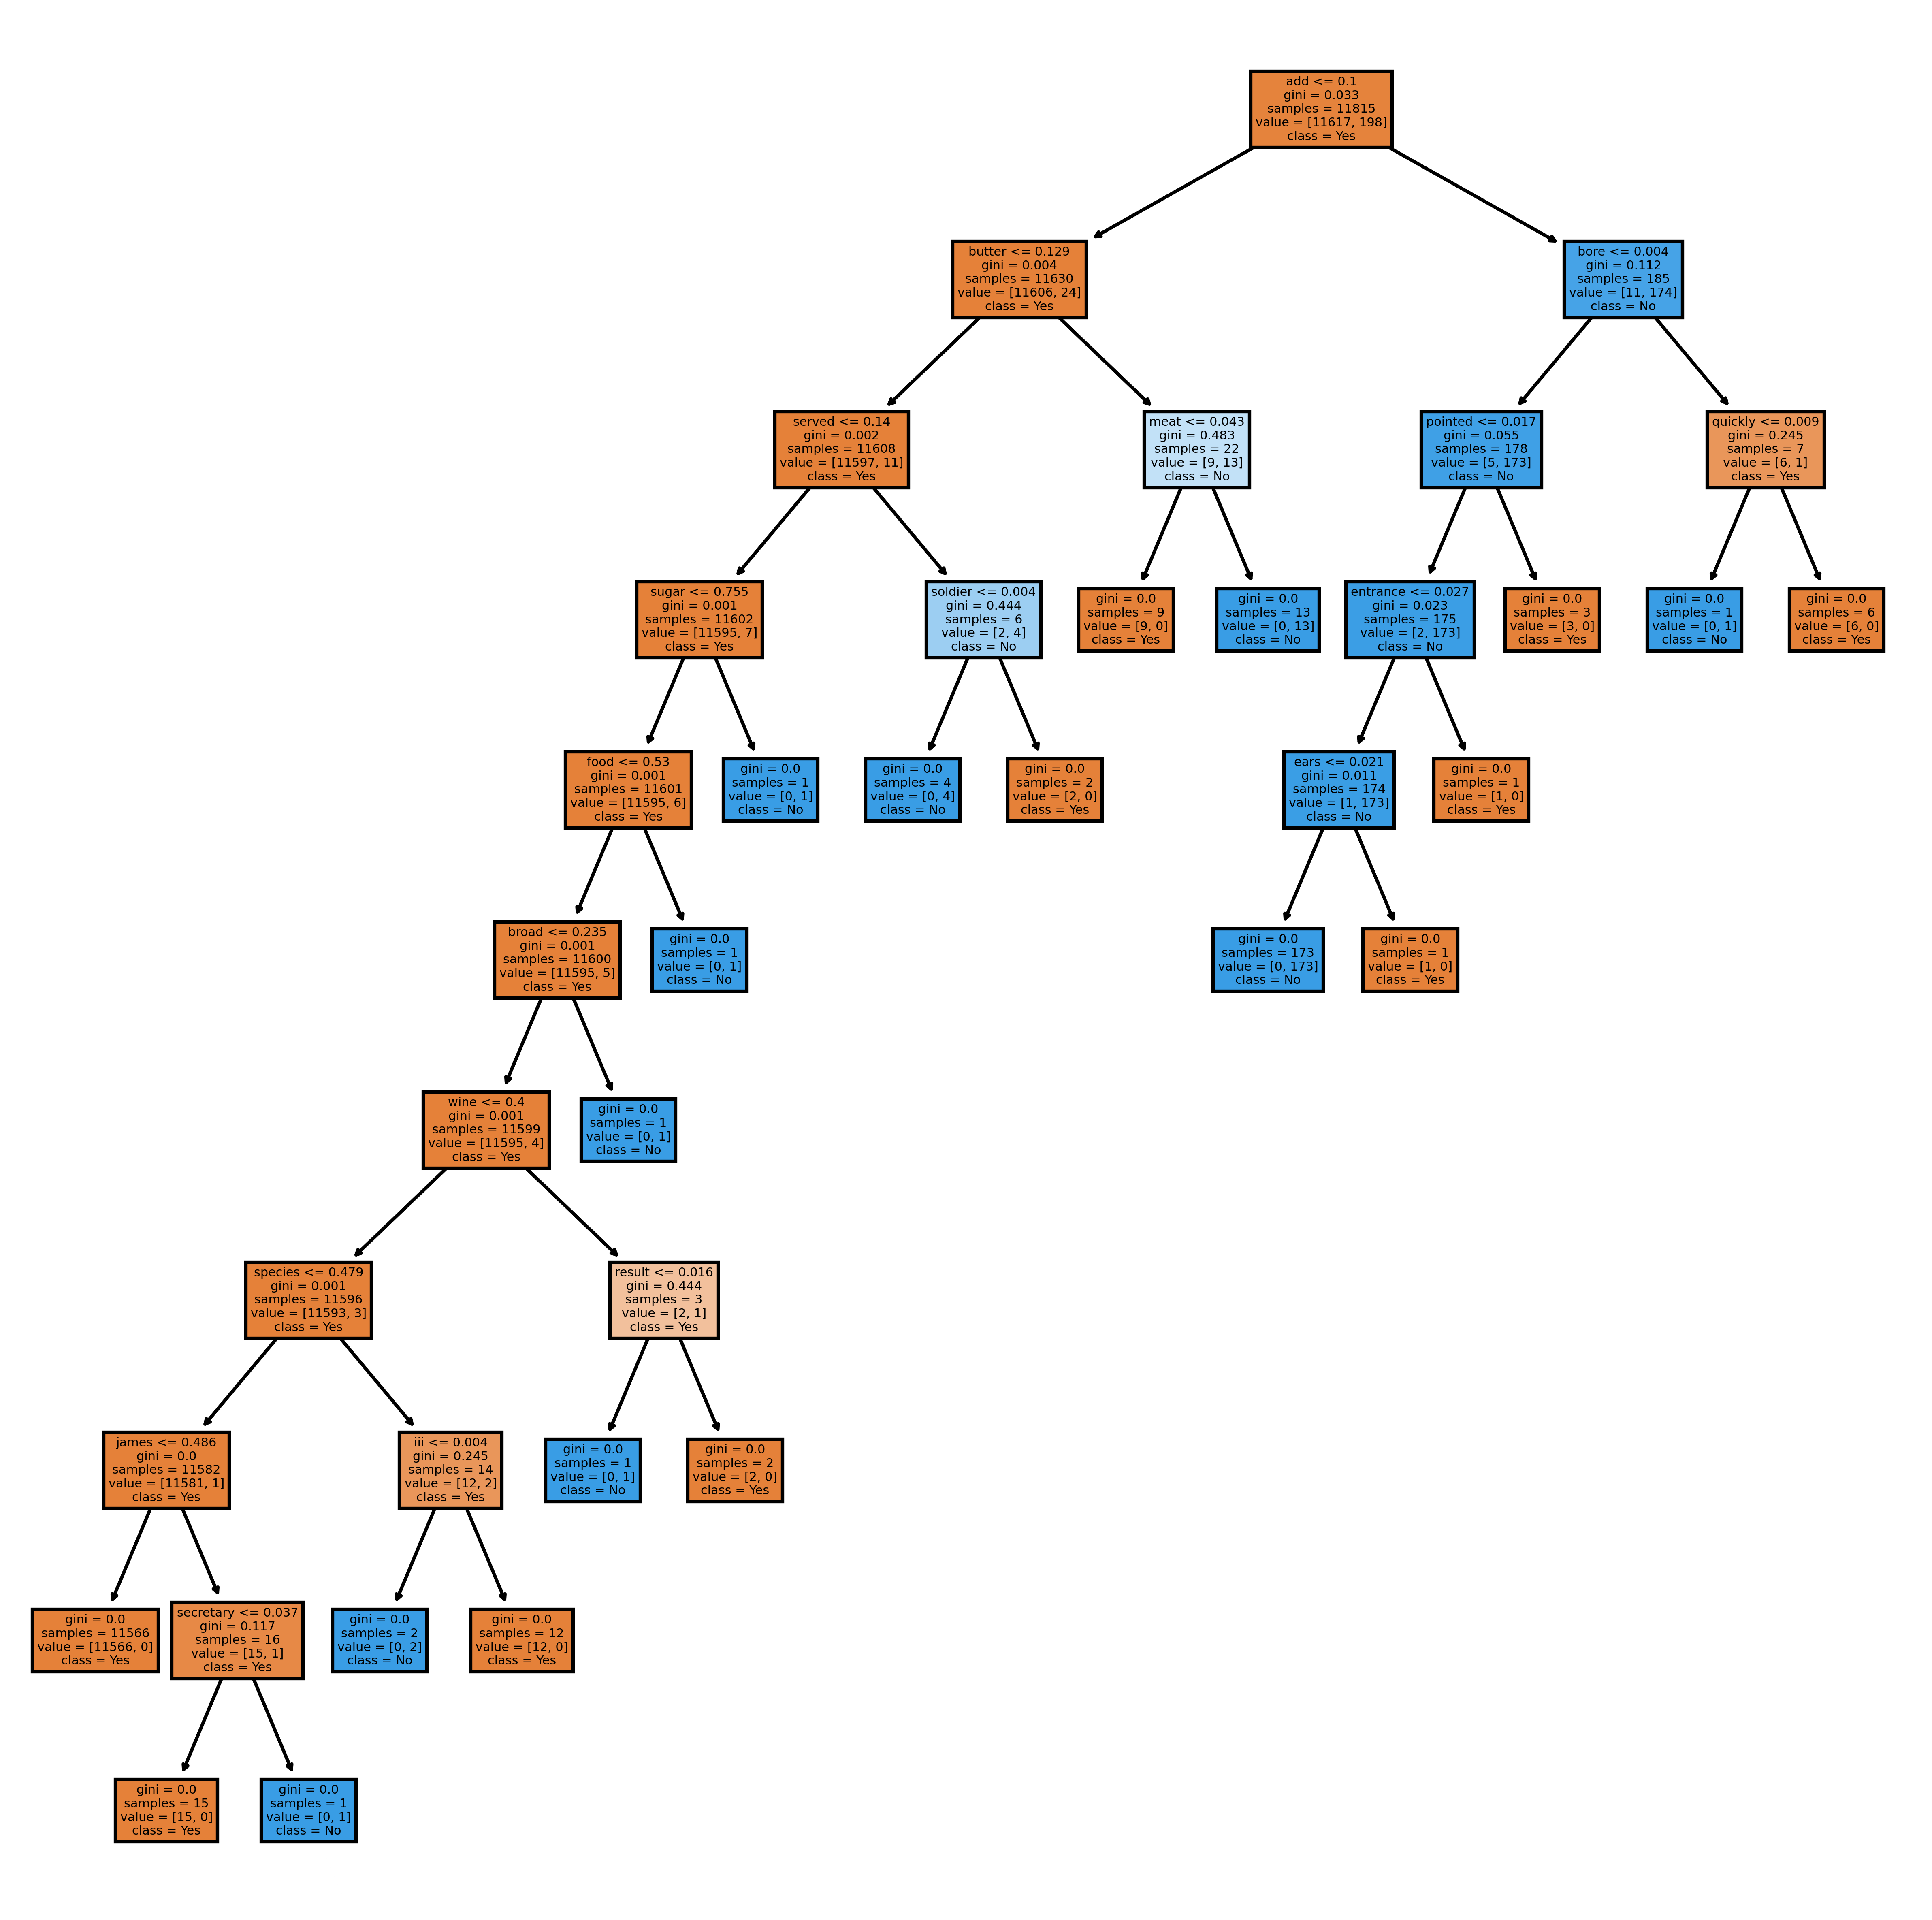

In [124]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(dts['Cooking'],
               feature_names = list(tfidf_model.get_feature_names_out()), 
               class_names= ["Yes","No"],
               filled = True);
fig.savefig('cooking.png')

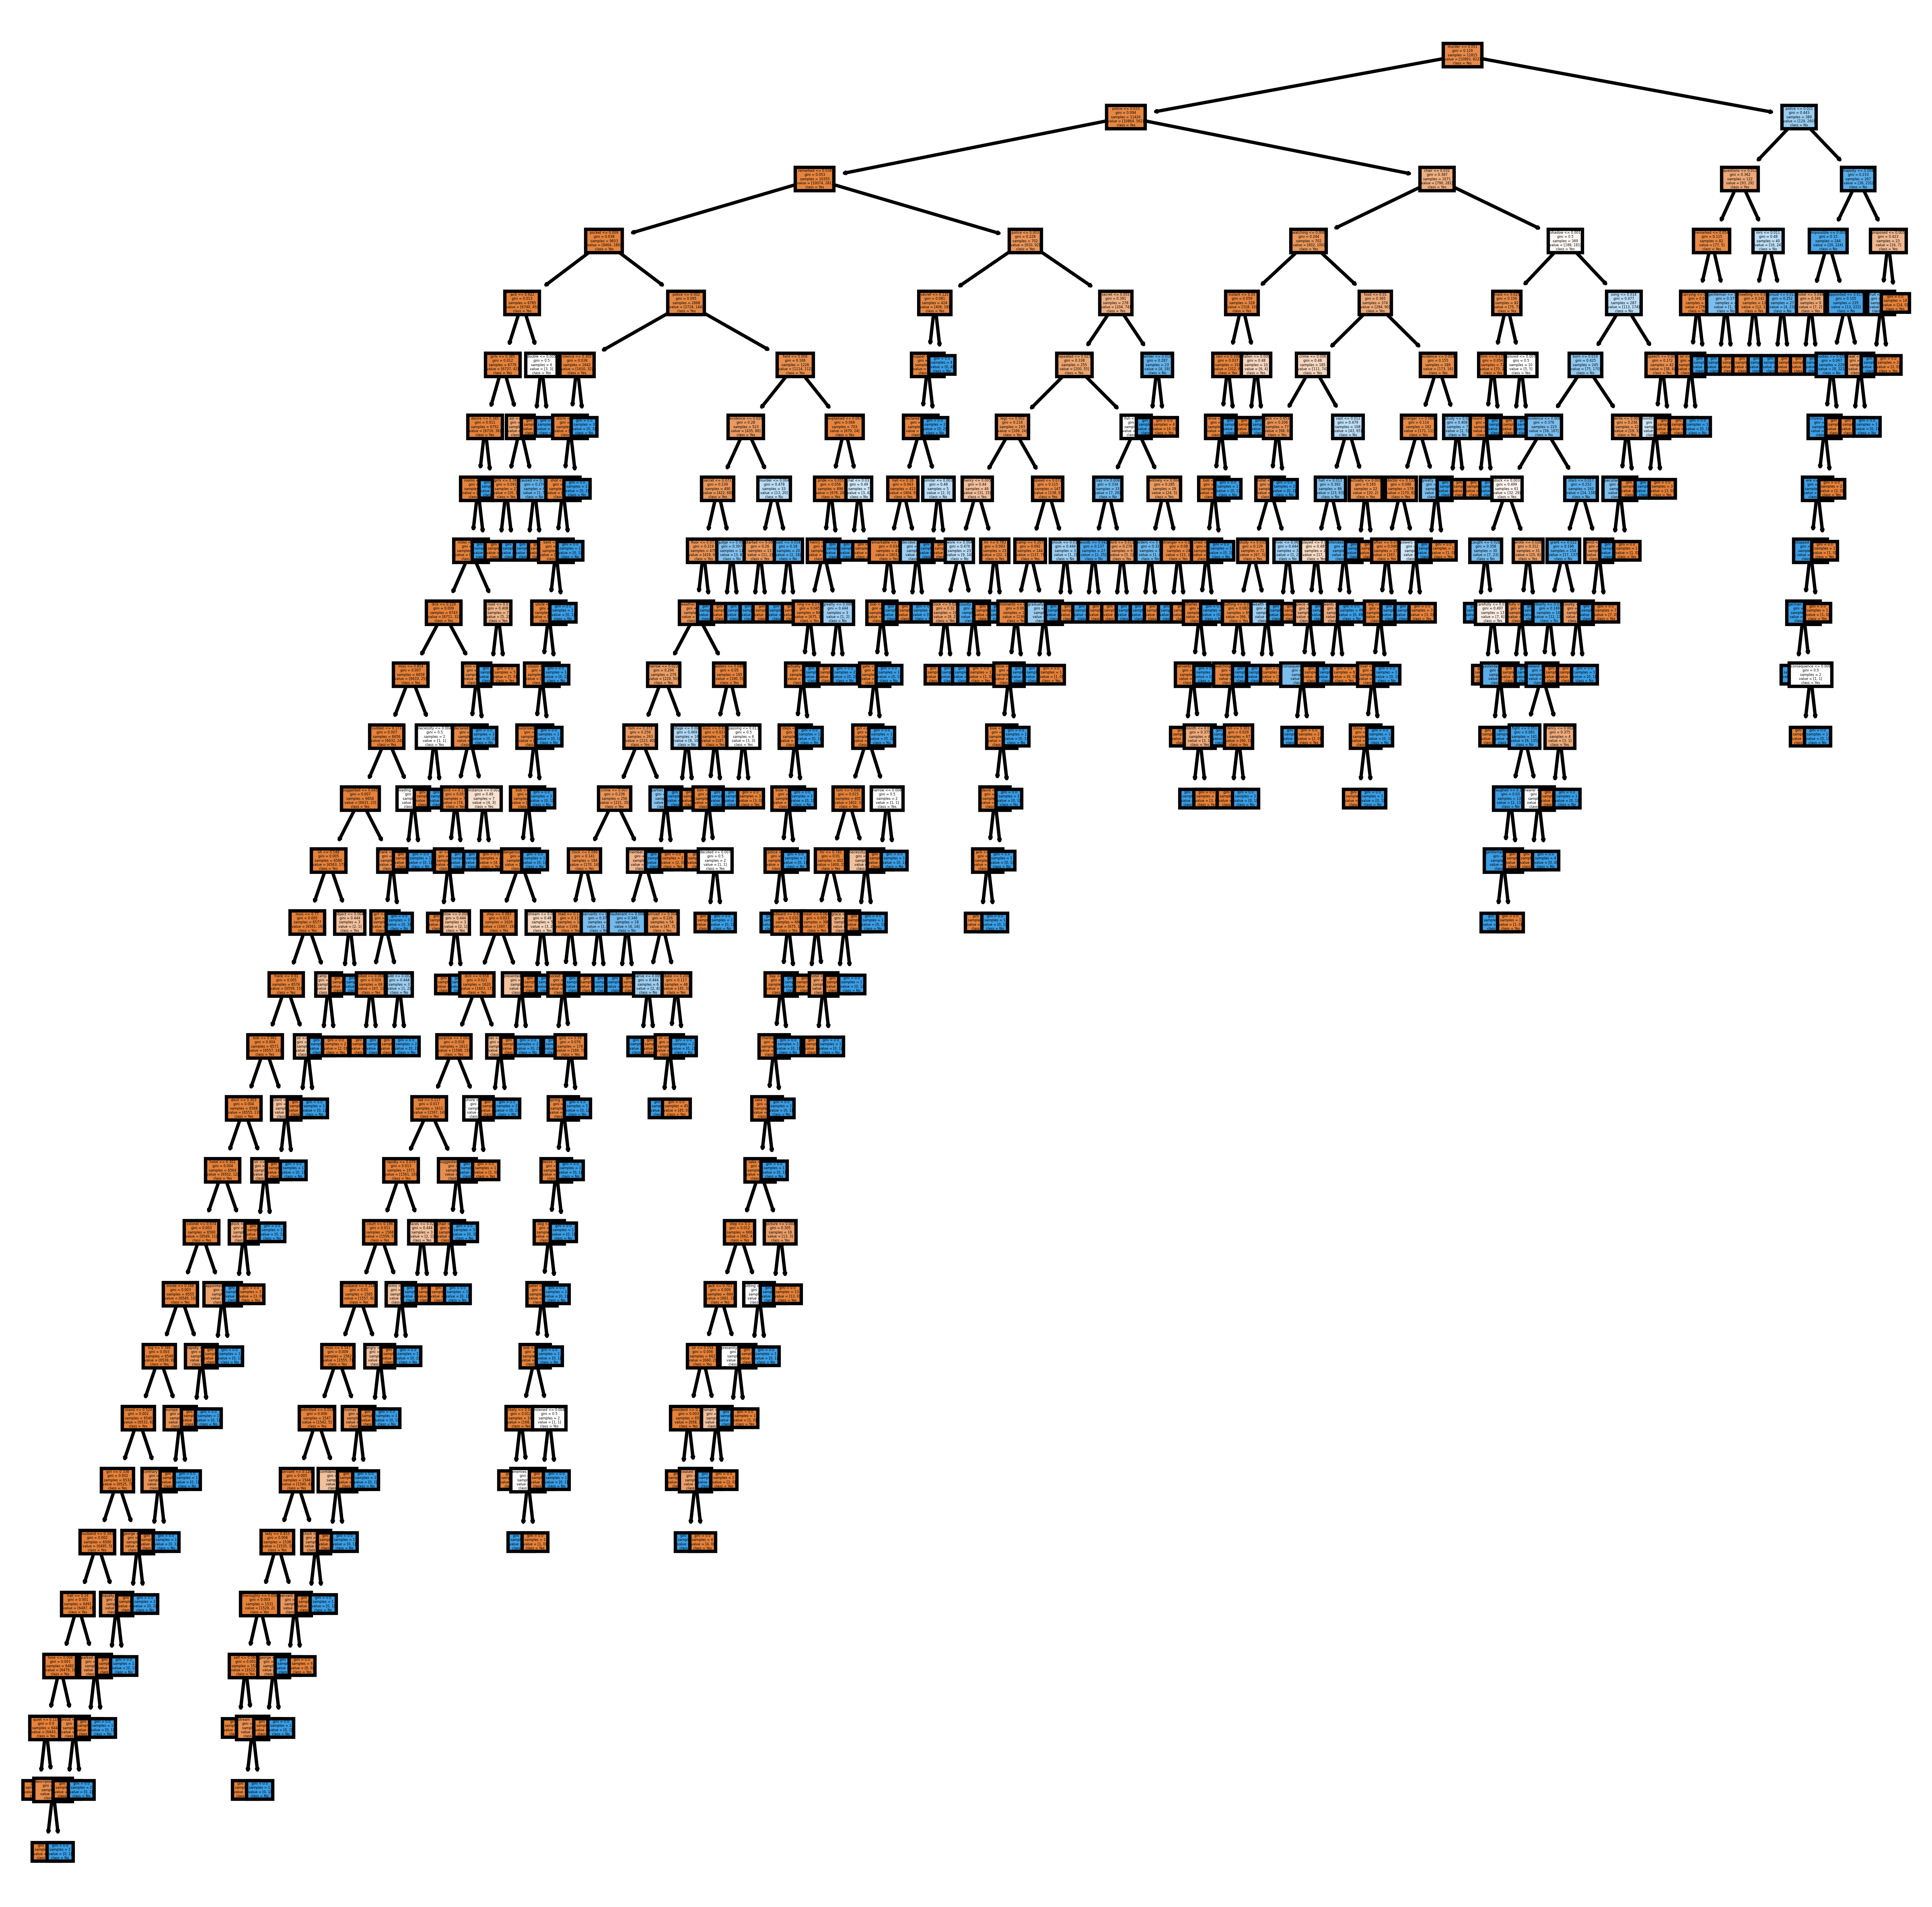

In [126]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(dts['Mistery'],
               feature_names = list(tfidf_model.get_feature_names_out()), 
               class_names= ["Yes","No"],
               filled = True);
fig.savefig('mistery.png')